In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_val_score,RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier
from scipy import stats
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
#https://github.com/ShefaaSaied/Dry-Bean-Classification/blob/main/Dry-Bean-Classification.ipynb
#https://github.com/bharatkulmani/Dry-Bean/blob/main/Dry%20Bean%20-%20Jupyter%20Notebook.pdf


In [9]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [10]:
import xgboost as xgb

In [11]:
df = pd.read_csv("C:\Program Files\Beans Data\Dry_Bean.csv")

In [12]:
df


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [16]:
df['Class'].unique()


array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [17]:
df.describe(percentiles=[.25, .5, .75, 0.995]).T


,count,mean,std,min,25%,50%,75%,99.5%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,200711.400000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1716.395500,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,651.184245,738.860154
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,401.341128,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.247550,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.895566,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,203371.050000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,505.523186,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.831485,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.993305,0.994677


In [18]:
df.info

<bound method DataFrame.info of         Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity 

In [19]:
df.duplicated(subset=None, keep='first').sum()


68

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


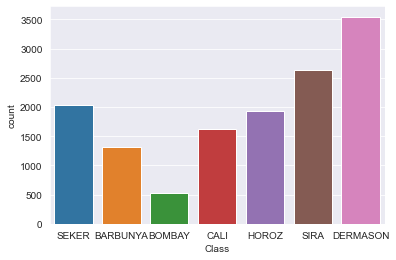

In [22]:
print(df['Class'].value_counts())
_ = sns.countplot(x='Class', data=df)

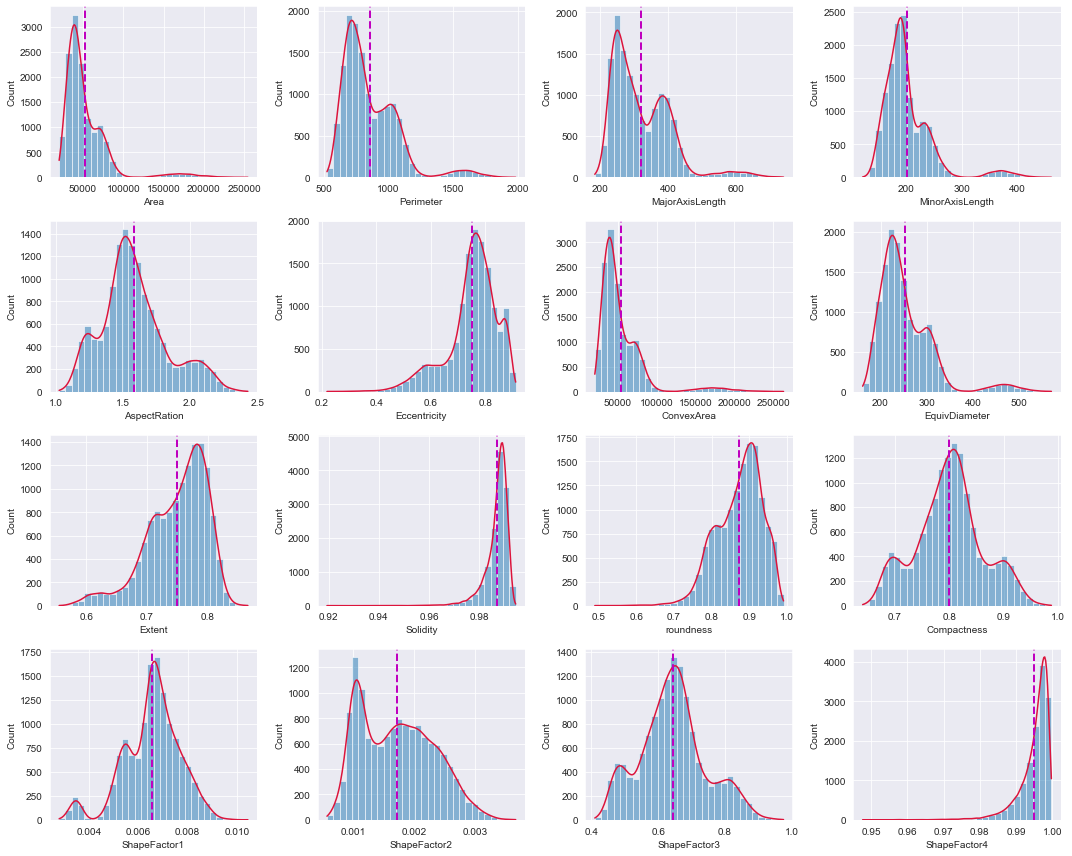

In [24]:
#Distribution of numerical features:

Numeric_cols = df.drop(columns=['Class']).columns

fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(Numeric_cols, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

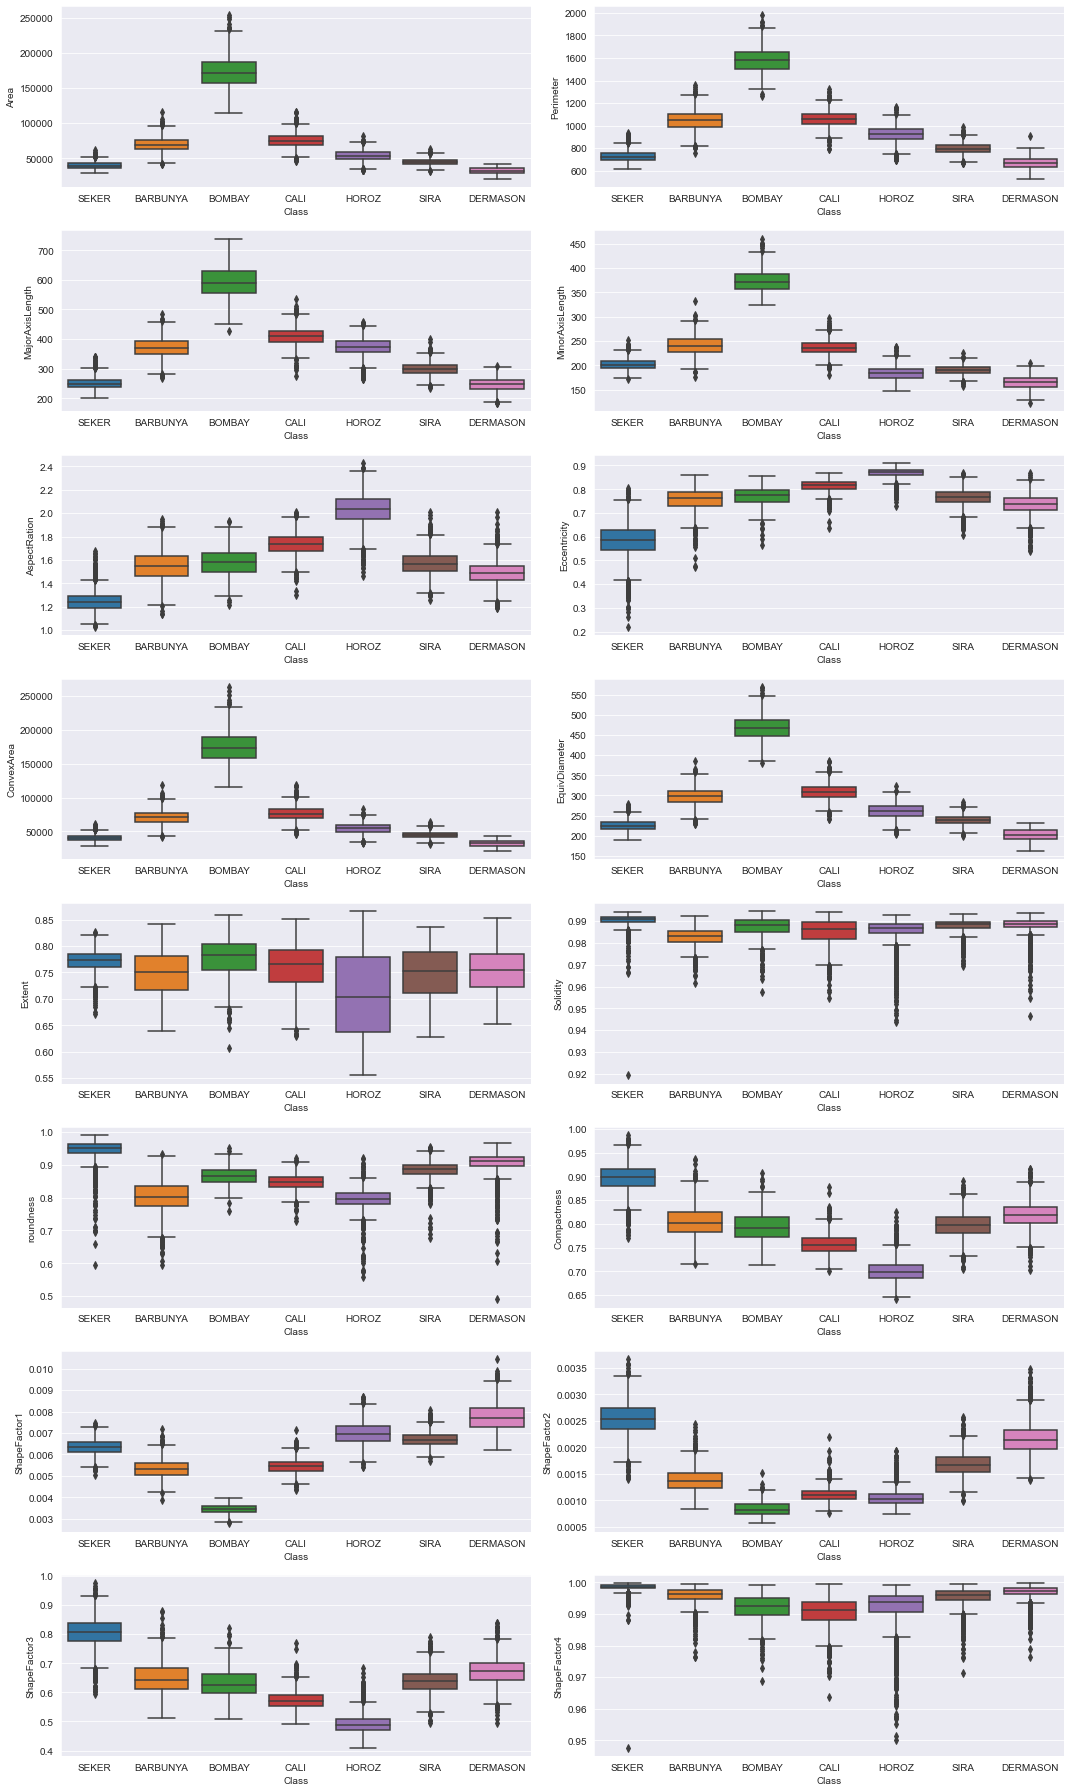

In [26]:
#Boxplot of numerical features for each type of bean:

fig, ax = plt.subplots(8, 2, figsize=(15, 25))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot)
plt.tight_layout()

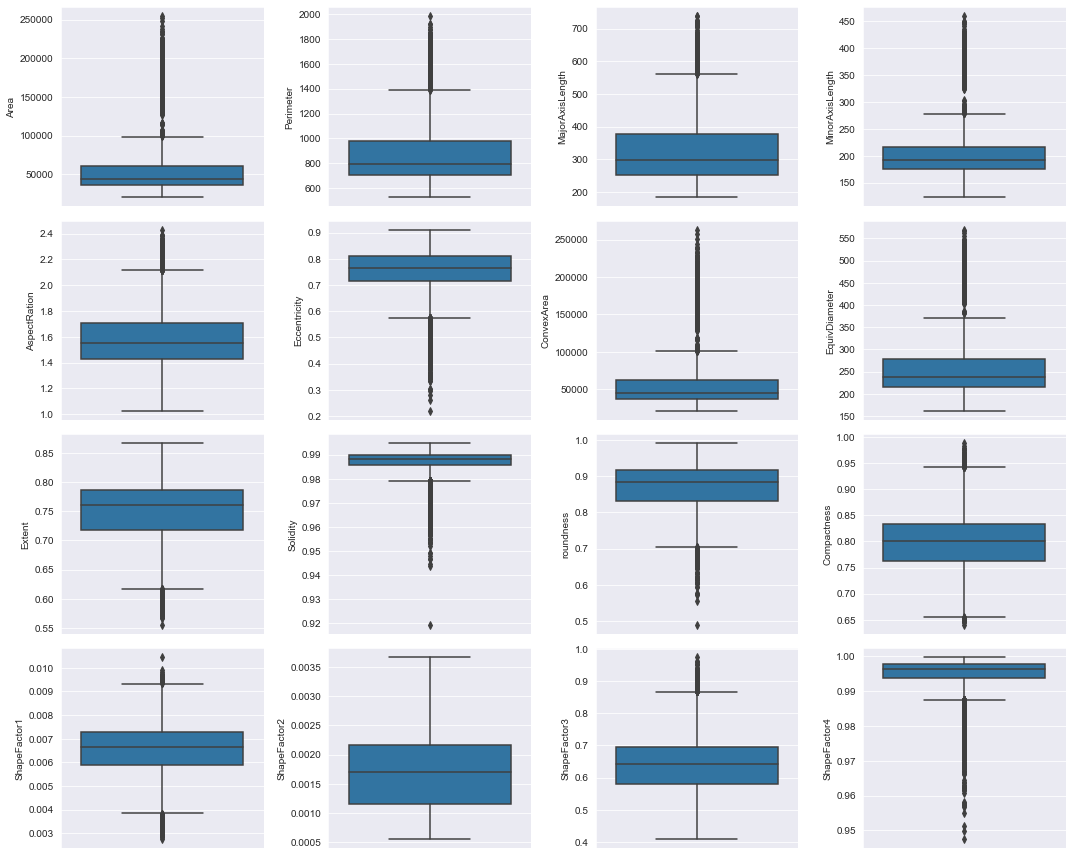

In [27]:
fig, ax = plt.subplots(4, 4, figsize=(15, 12))

for variable, subplot in zip(Numeric_cols, ax.flatten()):
    sns.boxplot(y= df[variable], ax=subplot)
plt.tight_layout()

<AxesSubplot:>

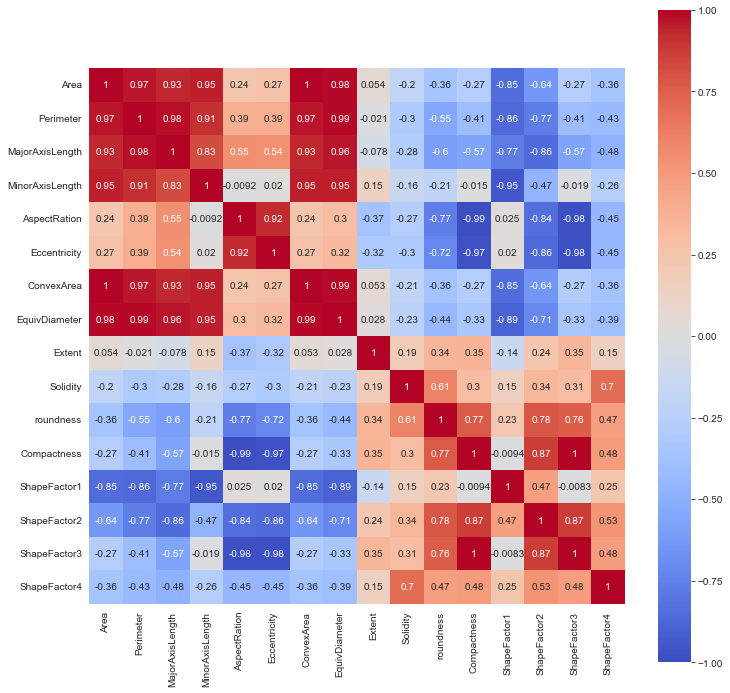

In [28]:
#Pearson linear correlation

plt.figure(figsize=(12,12))
sns.heatmap(df.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

In [29]:
#Adding new features
df['Bounding_rectangular_area'] = df['Area']/df['Extent']

In [37]:
#Label Encoding target column
le = preprocessing.LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [38]:
df['Class'].unique()


array([5, 0, 1, 2, 4, 6, 3], dtype=int64)

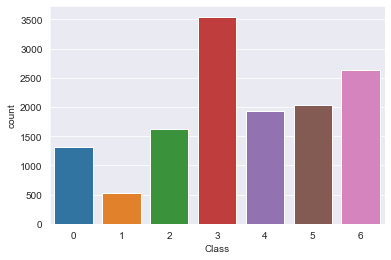

In [40]:
_ = sns.countplot(x='Class', data=df)


In [43]:
#Train Validation split
features = df.drop(columns=['Class']).columns
train_df, val_df = train_test_split(df, test_size=0.05, random_state=42, stratify = df['Class'])

In [45]:
#Removing Outliers in some features in the training set within certain threshold
train_df = train_df[train_df['Eccentricity'] >= 0.25]
train_df = train_df[train_df['Solidity'] >= 0.94]
train_df = train_df[train_df['roundness'] >= 0.53]
train_df = train_df[train_df['ShapeFactor4'] >= 0.96]

In [47]:
X_train = train_df[features]
y_train = train_df['Class']

X_val = val_df[features]
y_val = val_df['Class']

In [48]:
cols = ['Area', 'ConvexArea','MajorAxisLength','Perimeter','MinorAxisLength','EquivDiameter','Eccentricity',
                'ShapeFactor2','Extent','roundness','AspectRation','Compactness','ShapeFactor1','ShapeFactor3',
               'ShapeFactor4','Solidity','Bounding_rectangular_area']

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train[cols])
X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)

X_val_scaled = sc.transform(X_val[cols])
X_val[cols] = pd.DataFrame(X_val_scaled, index=X_val.index)

In [49]:
X_train = X_train.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                                'Perimeter','AspectRation'])
X_val = X_val.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                            'Perimeter','AspectRation'])

Train F1_Score:  0.9413995974609073
Val F1_Score:  0.9177679882525698


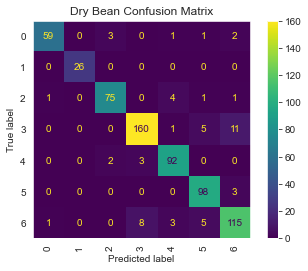

In [50]:
model_mlp= MLPClassifier(random_state=1, max_iter=500, alpha=0.005)

model_mlp.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_mlp.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_mlp.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_mlp, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

Train F1_Score:  0.9592816225421892
Val F1_Score:  0.9148311306901615


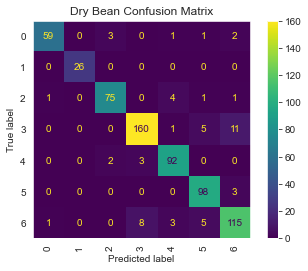

In [51]:
model_xgb= xgb.XGBClassifier(random_state=42,verbosity=0, min_child_weight=2,
                             max_depth=4, learning_rate=0.15, gamma=0.22, colsample_bytree=0.5)

model_xgb.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_xgb.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_xgb.predict(X_val), average='micro'))

# Displaying Results in Confusion Matrix
plot_confusion_matrix(model_mlp, X_val, y_val)  
plt.xticks(rotation=90)
plt.grid(False)
plt.title('Dry Bean Confusion Matrix')
plt.show()  

In [53]:
model_svc = SVC(probability=True, kernel='rbf', C=25)

model_svc.fit(X_train, y_train)

print("Train F1_Score: ", metrics.f1_score(y_train, model_svc.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_svc.predict(X_val), average='micro'))



Train F1_Score:  0.9424833565567425
Val F1_Score:  0.9148311306901615


In [64]:
dtc = DecisionTreeClassifier(max_depth=8)

dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [66]:
y_pred=dtc.predict(X_val)
y_pred

array([4, 6, 6, 5, 5, 0, 5, 2, 3, 5, 3, 6, 3, 3, 5, 4, 5, 5, 3, 3, 6, 6,
       4, 2, 4, 0, 4, 0, 3, 5, 6, 4, 2, 1, 2, 6, 5, 4, 6, 6, 3, 4, 4, 3,
       3, 6, 3, 5, 3, 4, 0, 6, 0, 3, 5, 1, 6, 5, 1, 4, 5, 5, 6, 6, 4, 4,
       4, 2, 0, 3, 6, 3, 4, 0, 5, 5, 5, 1, 3, 6, 3, 3, 3, 3, 2, 0, 6, 3,
       0, 5, 2, 5, 6, 6, 5, 6, 5, 0, 3, 6, 3, 6, 3, 3, 6, 3, 2, 6, 5, 6,
       6, 6, 3, 6, 6, 3, 6, 2, 4, 6, 4, 2, 3, 6, 3, 6, 2, 6, 0, 6, 5, 3,
       3, 6, 6, 3, 1, 5, 0, 4, 5, 1, 6, 4, 6, 3, 2, 2, 2, 0, 5, 5, 5, 6,
       3, 5, 6, 5, 4, 6, 6, 3, 4, 3, 5, 3, 3, 2, 3, 2, 2, 1, 5, 3, 6, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 4, 3, 3, 2, 2, 3, 5, 0, 6, 5, 3, 2, 2, 0,
       3, 6, 2, 0, 3, 3, 3, 3, 3, 1, 5, 6, 0, 6, 0, 2, 2, 5, 3, 4, 3, 6,
       3, 4, 5, 3, 6, 3, 2, 2, 3, 5, 4, 4, 5, 0, 2, 5, 3, 3, 5, 6, 4, 0,
       5, 6, 6, 4, 6, 0, 0, 3, 0, 1, 4, 2, 3, 4, 0, 3, 2, 4, 2, 5, 6, 6,
       3, 3, 6, 6, 5, 4, 4, 3, 2, 3, 2, 6, 4, 4, 5, 3, 3, 6, 2, 6, 4, 2,
       3, 0, 2, 3, 5, 3, 3, 2, 4, 6, 0, 3, 3, 5, 2,

In [72]:
dtc_train = dtc.score(X_train,y_train)
print("Training data accuracy by Decision Tree Algorithm is: ", round(dtc_train,2))

dtc_val = dtc.score(X_val,y_val)
print("Testing data accuracy by Decision Tree Algorithm is: ", round(dtc_val,2))


Training data accuracy by Decision Tree Algorithm is:  0.94
Testing data accuracy by Decision Tree Algorithm is:  0.89
